# pandas 入门

Pandas 是一个提供了一系列强大的用来管理数据的数据结构的 Python 库。本章节，你将学到如何使用 Series 与 DataFrame 对象来处理数据。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = os.environ['TIINGO_API_KEY']

client = TiingoClient(config)

def get_df_from_tiingo(symbol, start, end):
    df = pd.DataFrame(client.get_ticker_price(symbol,
                      startDate=start,
                      endDate=end,
                      frequency='daily'
                     ))
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    del df.index.name
    return df

使用 Pandas 可以方便的储存、可视化、计算数据。仅仅几行代码便可以修改呈现数据成更便于理解的形式。现在我们使用 NumPy 模拟一些回报数据，将他们放入 pandas 的 DataFrame 中，计算得到价格，并绘制出来。

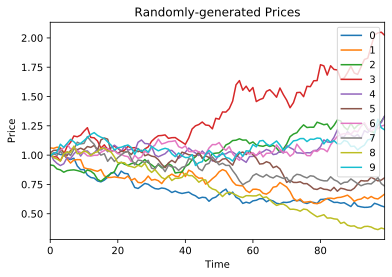

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

## pandas 数据结构

### Series

pandas 的 Series 是一个带标签的一维数组。我们主要用它来处理时序数据。

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


每一个 Series 都有 name。

In [4]:
print(s.name)

None


name 可以直接修改

In [5]:
s.name = 'Toy Series'
print(s.name)

Toy Series


一个 Series 的轴标签是它的 index。index 可以被作为参数传入 Series 或者之后再添加。没有 index 的时候，Series 会使用从 0 开始的整数做 index。

In [6]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


pandas 有用来创建日期 index 的内置函数 `date_range()`。

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


index 的长度必须要与 Series 的长度相同。它们之间一一对应。

In [8]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


#### 访问 Series 中的元素

Series 可以通过 `iloc[]` 与 `loc[]` 访问。`iloc` 通过整数 index 访问元素，`loc` 通过 Series 的 index 访问元素。

In [9]:
print('First element of the series: ', s.iloc[0])
print('Last element of the series: ', s.iloc[len(s) - 1])

First element of the series:  1.0
Last element of the series:  5.0


In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [11]:
start = 0
end = len(s) - 1
step = 1
s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [13]:
s.loc['2016-01-01']

1.0

In [14]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

对于 Series 也可以用括号（[]）来访问元素，但这不是最佳实践。因为括号既可以使用 index 也可以使用整数值访问 Series（与 DataFrame），结果会随着上下文而改变。

#### 布尔值检索

除了上述的访问方法，你还可以使用布尔数组筛选 Series。Series 兼容标准的比较运算符。使用比较条件，我们可以得到一个填充着布尔值的 Series。

In [15]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


我们可以回传这个 Series 到原 Series 来筛选得到条件为 True 的值。

In [16]:
print(s.loc[ s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


我们能够使用逻辑运算符 `&`、`|`、`~` 来组合多个条件。

In [17]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


这样我们能够非常方便的从 Series 中取得符合条件的元素。

#### 检索与时间序列

由于我们使用 Series 来处理时序数据，所以有必要讲解下如何来处理时间组件。

In [18]:
symbol = 'CMG'
start = '2012-01-01'
end = '2016-01-01'
prices = get_df_from_tiingo(symbol, start, end).loc[:,'close']

我们可以使用 `head()` 方法查看 series 的前几条元素。

In [19]:
print(type(prices))
prices.head(5)

<class 'pandas.core.series.Series'>


2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
Name: close, dtype: float64

我们可以为时间序列指定 name。

In [20]:
print('Old name: ', prices.name)
prices.name = symbol
print('New name: ', prices.name)

Old name:  close
New name:  CMG


现在查看一下时间序列的 `DatetimeIndex`。

In [21]:
print(prices.index)

DatetimeIndex(['2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               '2012-01-11 00:00:00+00:00', '2012-01-12 00:00:00+00:00',
               '2012-01-13 00:00:00+00:00', '2012-01-17 00:00:00+00:00',
               ...
               '2015-12-17 00:00:00+00:00', '2015-12-18 00:00:00+00:00',
               '2015-12-21 00:00:00+00:00', '2015-12-22 00:00:00+00:00',
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-29 00:00:00+00:00',
               '2015-12-30 00:00:00+00:00', '2015-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1006, freq=None)


可以看出 `DatetimeIndex` 有一个关联信息的集合。包括频率（freq）与时区（tz）。频率是指数据是每日的、每月的或是其他周期的；时区是指 index 所用的时区。我们可以修改这些信息。

如果我们从 Series 中重新取样，我们可以修改频率。

In [22]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

2012-01-31 00:00:00+00:00    354.829000
2012-02-29 00:00:00+00:00    379.535500
2012-03-31 00:00:00+00:00    407.002273
2012-04-30 00:00:00+00:00    422.799000
2012-05-31 00:00:00+00:00    405.805455
2012-06-30 00:00:00+00:00    403.033333
2012-07-31 00:00:00+00:00    353.880476
2012-08-31 00:00:00+00:00    294.535217
2012-09-30 00:00:00+00:00    326.513158
2012-10-31 00:00:00+00:00    276.573333
Freq: M, Name: CMG, dtype: float64

`resample()` 方法默认使用低级的数据创建高级的数据。<del>我们可以通过指定 `how` 参数来指定如何取样。</del>

In [23]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

2012-01-31 00:00:00+00:00    355.505
2012-02-29 00:00:00+00:00    378.195
2012-03-31 00:00:00+00:00    408.995
2012-04-30 00:00:00+00:00    420.835
2012-05-31 00:00:00+00:00    405.240
2012-06-30 00:00:00+00:00    402.450
2012-07-31 00:00:00+00:00    380.470
2012-08-31 00:00:00+00:00    295.390
2012-09-30 00:00:00+00:00    332.810
2012-10-31 00:00:00+00:00    286.560
Freq: M, Name: CMG, dtype: float64

时间序列已被本地化为 UTC，我们可以修改时间为 'Asia/Shanghai'。

In [24]:
eastern_prices = prices.tz_convert('Asia/Shanghai')
eastern_prices.head(10)

2012-01-03 08:00:00+08:00    341.27
2012-01-04 08:00:00+08:00    348.75
2012-01-05 08:00:00+08:00    350.48
2012-01-06 08:00:00+08:00    348.95
2012-01-09 08:00:00+08:00    339.74
2012-01-10 08:00:00+08:00    341.12
2012-01-11 08:00:00+08:00    347.60
2012-01-12 08:00:00+08:00    347.62
2012-01-13 08:00:00+08:00    354.62
2012-01-17 08:00:00+08:00    353.38
Name: CMG, dtype: float64

我们得到的数据只包含交易日。如果我们想获得日历中每一天的价格呢？首先让我们创建一个新的 DatetimeIndex。

In [25]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print(calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


现在可以使用新的日期序列来 reindex 我们的时间 series。这里要用的的填充方法是 `ffill`，意即 "forward fill"。任何 NaN 值都会被填充为上一条值。

In [26]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00       NaN
2012-01-02 00:00:00+00:00       NaN
2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-07 00:00:00+00:00    348.95
2012-01-08 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
2012-01-10 00:00:00+00:00    341.12
2012-01-11 00:00:00+00:00    347.60
2012-01-12 00:00:00+00:00    347.62
2012-01-13 00:00:00+00:00    354.62
2012-01-14 00:00:00+00:00    354.62
2012-01-15 00:00:00+00:00    354.62
Freq: D, Name: CMG, dtype: float64

由于前两条一天周日、一天休市，所以值是 `NaN`。

#### 缺失的数据

当我们处理真实数据的时候，很有可能遇到缺失的值。有两种方法解决这些缺失的数据。第一种是用 `fillna()` 填充缺失的数据。

In [27]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.068188
2012-01-02 00:00:00+00:00    501.068188
2012-01-03 00:00:00+00:00    341.270000
2012-01-04 00:00:00+00:00    348.750000
2012-01-05 00:00:00+00:00    350.480000
2012-01-06 00:00:00+00:00    348.950000
2012-01-07 00:00:00+00:00    348.950000
2012-01-08 00:00:00+00:00    348.950000
2012-01-09 00:00:00+00:00    339.740000
2012-01-10 00:00:00+00:00    341.120000
Freq: D, Name: CMG, dtype: float64

除了使用特定值填充数据，还可以使用参数 `method`。我们能够用 'backward fill' 来用后一个数据填充：

In [28]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    341.27
2012-01-02 00:00:00+00:00    341.27
2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-07 00:00:00+00:00    348.95
2012-01-08 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
2012-01-10 00:00:00+00:00    341.12
Freq: D, Name: CMG, dtype: float64

现在时序数据已被清理，所有的 NaN 值都被合适的处理了。是时候讨论如何使用 pandas 数据结构做分析了。

#### 使用 pandas 分析时间 series

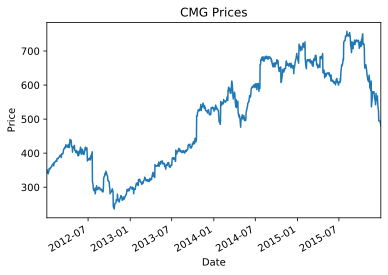

In [29]:
prices.plot();
plt.title(symbol + ' Prices')
plt.ylabel('Price')
plt.xlabel('Date');

In [30]:
print('Mean: ', prices.mean())
print('Standard deviation: ', prices.std())

Mean:  501.6366540755467
Standard deviation:  146.68873568766415


In [31]:
print('Summary Statistics')
print(prices.describe())

Summary Statistics
count    1006.000000
mean      501.636654
std       146.688736
min       236.240000
25%       371.555000
50%       521.270000
75%       646.835000
max       757.770000
Name: CMG, dtype: float64


我们能够轻易的使用基础数学运算符与标量修改 Series。

In [32]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-03 00:00:00+00:00    672.54
2012-01-04 00:00:00+00:00    687.50
2012-01-05 00:00:00+00:00    690.96
2012-01-06 00:00:00+00:00    687.90
2012-01-09 00:00:00+00:00    669.48
Name: CMG, dtype: float64

In [33]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2012-01-03 00:00:00+00:00    361.501422
2012-01-04 00:00:00+00:00    397.655743
2012-01-05 00:00:00+00:00    388.307735
2012-01-06 00:00:00+00:00    366.464116
2012-01-09 00:00:00+00:00    438.567435
dtype: float64

如果没有匹配的索引，会返回空的 Series。

In [34]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

除了观察时间 series 本身，我们还希望看到它的一阶导数或是变动的百分比。这两个都有内置方法。

In [35]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

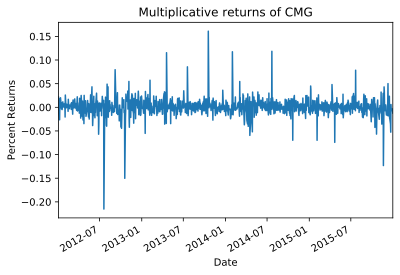

In [36]:
plt.title('Multiplicative returns of ' + symbol)
plt.xlabel('Date')
plt.ylabel('Percent Returns')
mult_returns.plot();

pandas 有用来计算移动平均值与标准差的函数。

In [37]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.name = '30-day rolling mean'

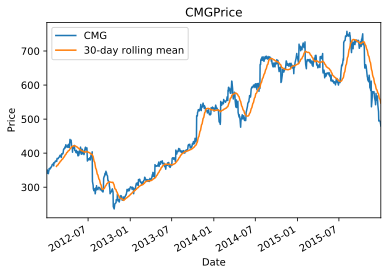

In [38]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + 'Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

In [39]:
rolling_std = prices.rolling(window=30, center=False).std()
rolling_std.name = '30-day rolling volatility'

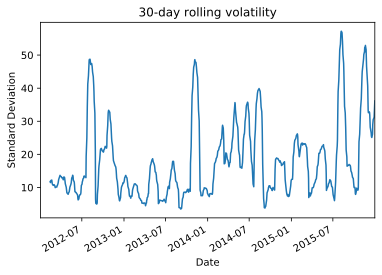

In [40]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel('Date')
plt.ylabel('Standard Deviation');

许多 NumPy 的函数也可以在 Series 上和对一维 NumPy 的数组效果相同。

In [41]:
print(np.median(mult_returns))

0.00023598024508242332


大多数这些函数已经被实现为 Series 和 DataFrame 方法。

In [42]:
print(mult_returns.median())

0.00023598024508242332


### DataFrames

许多与 Series 相关的工作都包含在 DataFrame 中。pandas 的 DataFrame 允许我们用它直观的结构轻松管理我们的数据。

和 Series 相似，DataFrame 能够保持多种类型的数据，但 DataFrame 是二维对象。每一个 DataFrame 有一个 index 和一个 columns 属性。index 属性和 Series 的 index 类似。columns 属性为 DataFrames 提供第二个维度，允许我们合并命名的列到一个索引一直的内聚对象。

我们可以通过对字典或 NumPy ndarray 调用 `pandas.DataFrame` 来创建 DataFrame。也可以使用 `pandas.concat()` 来合并一组 pandas Series 到一个 DataFrame。

In [43]:
dict_data = {
    'a': [1, 2, 3, 4, 5],
    'b': ['L', 'K', 'J', 'M', 'Z'],
    'c': np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-1.27158305, -0.05931433,  0.12999317, -0.25936177, -0.17653564])}


每一个 DataFrame 有一部分我们要留意的属性。第一个便是 index 属性。我们可以像 Series 那样加入一个 Timestamp 对象的 index。

In [44]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -1.271583
2016-01-02  2  K -0.059314
2016-01-03  3  J  0.129993
2016-01-04  4  M -0.259362
2016-01-05  5  Z -0.176536


我们可以合并 Series 到 DataFrame。合并 Series 是基于对应的 index 的。

In [45]:
s_1 = pd.Series([2, 4, 6, 0, 10], name='Events')
s_2 = pd.Series([1, 3, 5, 7, 9], name='Odds')
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Events  Odds
0       2     1
1       4     3
2       6     5
3       0     7
4      10     9


我们稍后会用 `pandas.concat()` 来合并多个 DataFrame 到一个。

每一个 DataFrame 还有一个 columns 属性。当我们合并两个 Series 时，列名就是 Series 的 name。

In [46]:
print(numbers.columns)

Index(['Events', 'Odds'], dtype='object')


同样的道理，DataFrame 的 index 可以在事后改变。

In [47]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [48]:
numbers.index = pd.date_range('2016-01-01', periods=len(numbers))
print(numbers)

            Events  Odds
2016-01-01       2     1
2016-01-02       4     3
2016-01-03       6     5
2016-01-04       0     7
2016-01-05      10     9


除了 index 和 columns，我们还可以通过 values 属性之间访问它包含的值。

In [49]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 0,  7],
       [10,  9]])

这返回一个 NumPy 数组。

In [50]:
type(numbers.values)

numpy.ndarray

#### 访问 `DataFrame` 元素

In [51]:
symbol = ['CMG', 'MCD', 'SHAK', 'WFM']
start = '2012-01-01'
end = '2016-01-01'

prices = pd.concat(
    [
        get_df_from_tiingo(
            ticker,
            start=start,
            end=end
        ).loc[:, 'close'] for ticker in symbol
    ],
    axis=1,
    keys=symbol
)

In [52]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
Name: CMG, dtype: float64

现在我们可以直接访问 CMG 列。

In [53]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
Name: CMG, dtype: float64

我们还能够使用 `loc[]` 来访问单个列。

In [54]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    341.27
2012-01-04 00:00:00+00:00    348.75
2012-01-05 00:00:00+00:00    350.48
2012-01-06 00:00:00+00:00    348.95
2012-01-09 00:00:00+00:00    339.74
Name: CMG, dtype: float64

访问单个列会返回一个 Series。

In [55]:
print(type(prices.CMG))
print(type(prices.loc[:,'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


当你传入一个二维 tuple 到 DateFrame 时，tuple 的第一个元素对应行，第二个元素对应列。

In [56]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,341.27,98.84
2012-01-04 00:00:00+00:00,348.75,99.39
2012-01-05 00:00:00+00:00,350.48,99.83
2012-01-06 00:00:00+00:00,348.95,100.60
2012-01-09 00:00:00+00:00,339.74,99.64


我们还可以使用 `loc[]` 通过 index 值访问 `DataFrame`。

In [57]:
prices.loc['2015-12-15': '2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,554.86,116.93,41.58,32.970
2015-12-16 00:00:00+00:00,567.83,117.84,40.17,33.650
2015-12-17 00:00:00+00:00,554.89,117.50,38.54,33.380
2015-12-18 00:00:00+00:00,541.08,116.66,39.75,32.750
2015-12-21 00:00:00+00:00,522.01,117.69,38.19,32.980
2015-12-22 00:00:00+00:00,494.61,117.72,39.75,34.785


In [58]:
prices.loc['2015-12-15': '2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
2015-12-15 00:00:00+00:00,554.86,116.93
2015-12-16 00:00:00+00:00,567.83,117.84
2015-12-17 00:00:00+00:00,554.89,117.50
2015-12-18 00:00:00+00:00,541.08,116.66
2015-12-21 00:00:00+00:00,522.01,117.69
2015-12-22 00:00:00+00:00,494.61,117.72


使用 `iloc` 可以通过整数 index 访问 DataFrame。

In [59]:
prices.iloc[0:2, 1]

2012-01-03 00:00:00+00:00    98.84
2012-01-04 00:00:00+00:00    99.39
Name: MCD, dtype: float64

In [60]:
# 使用整数 index 访问价格数据在
# [1, 3, 5, 7, 9, 11, 13, ..., 99] 行
# 0 或者第 3 列
prices.iloc[[1, 3, 5] + [i for i in range(7, 100, 2)], [0, 3]].head(20)

,CMG,WFM
2012-01-04 00:00:00+00:00,348.75,71.49
2012-01-06 00:00:00+00:00,348.95,72.88
2012-01-10 00:00:00+00:00,341.12,72.68
2012-01-12 00:00:00+00:00,347.62,71.93
2012-01-17 00:00:00+00:00,353.38,76.73
2012-01-19 00:00:00+00:00,358.09,77.33
2012-01-23 00:00:00+00:00,360.46,76.12
2012-01-25 00:00:00+00:00,363.14,77.15
2012-01-27 00:00:00+00:00,366.76,74.89
2012-01-31 00:00:00+00:00,367.29,74.03


#### Boolean 索引

In [61]:
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,341.27,98.84,NaN,69.64
2012-01-04 00:00:00+00:00,348.75,99.39,NaN,71.49
2012-01-05 00:00:00+00:00,350.48,99.83,NaN,72.75
2012-01-06 00:00:00+00:00,348.95,100.60,NaN,72.88
2012-01-09 00:00:00+00:00,339.74,99.64,NaN,72.89


组合多个布尔条件。

In [62]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.84,92.44,45.90,52.095
2015-02-02 00:00:00+00:00,712.55,92.51,43.99,53.150
2015-02-03 00:00:00+00:00,726.63,93.92,44.98,53.410
2015-02-04 00:00:00+00:00,676.00,94.05,41.32,53.680
2015-02-05 00:00:00+00:00,670.91,94.34,42.64,53.375


#### 添加删除列，合并 DataFrame/Series

In [63]:
s_1 =  get_df_from_tiingo('TSLA', start, end).loc[:, 'close']

prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,341.27,98.84,NaN,69.64,28.08
2012-01-04 00:00:00+00:00,348.75,99.39,NaN,71.49,27.71
2012-01-05 00:00:00+00:00,350.48,99.83,NaN,72.75,27.12
2012-01-06 00:00:00+00:00,348.95,100.60,NaN,72.88,26.91
2012-01-09 00:00:00+00:00,339.74,99.64,NaN,72.89,27.25


In [64]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,341.27,98.84,NaN,69.64
2012-01-04 00:00:00+00:00,348.75,99.39,NaN,71.49
2012-01-05 00:00:00+00:00,350.48,99.83,NaN,72.75
2012-01-06 00:00:00+00:00,348.95,100.60,NaN,72.88
2012-01-09 00:00:00+00:00,339.74,99.64,NaN,72.89


如果想将多个 DataFrame 合并为一个，可以使用 `pandas.concat()` 方法。

In [65]:
df_1 = pd.concat(
    [
        get_df_from_tiingo(
            symbol, start, end
        ).loc[:, 'close'] for symbol in ['SPY', 'NVDA']
    ],
    axis=1,
    keys=['SPY', 'VXX']
)

df_2 = pd.concat(
    [
        get_df_from_tiingo(
            symbol, start, end
        ).loc[:, 'close'] for symbol in ['MSFT', 'AAPL', 'GOOG']
    ],
    axis=1,
    keys=['MSFT', 'AAPL', 'GOOG']
)

In [66]:
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,SPY,VXX,MSFT,AAPL,GOOG
2012-01-03 00:00:00+00:00,127.50,14.04,26.765,411.23,NaN
2012-01-04 00:00:00+00:00,127.70,14.20,27.400,413.44,NaN
2012-01-05 00:00:00+00:00,128.04,14.71,27.680,418.03,NaN
2012-01-06 00:00:00+00:00,127.71,14.54,28.105,422.40,NaN
2012-01-09 00:00:00+00:00,128.02,14.54,27.740,421.73,NaN


#### 缺失的数据

In [67]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,341.27,98.84,0.0,69.64
2012-01-04 00:00:00+00:00,348.75,99.39,0.0,71.49
2012-01-05 00:00:00+00:00,350.48,99.83,0.0,72.75
2012-01-06 00:00:00+00:00,348.95,100.60,0.0,72.88
2012-01-09 00:00:00+00:00,339.74,99.64,0.0,72.89


In [68]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,341.27,98.84,45.9,69.64
2012-01-04 00:00:00+00:00,348.75,99.39,45.9,71.49
2012-01-05 00:00:00+00:00,350.48,99.83,45.9,72.75
2012-01-06 00:00:00+00:00,348.95,100.60,45.9,72.88
2012-01-09 00:00:00+00:00,339.74,99.64,45.9,72.89


这种情况下最好的做法是丢掉缺失的值。

In [69]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.84,92.44,45.90,52.095
2015-02-02 00:00:00+00:00,712.55,92.51,43.99,53.150
2015-02-03 00:00:00+00:00,726.63,93.92,44.98,53.410
2015-02-04 00:00:00+00:00,676.00,94.05,41.32,53.680
2015-02-05 00:00:00+00:00,670.91,94.34,42.64,53.375


#### 使用 pandas 分析时序 Series

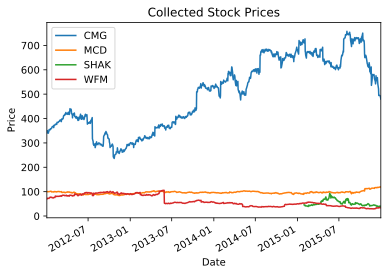

In [70]:
prices.plot()
plt.title('Collected Stock Prices')
plt.ylabel('Price')
plt.xlabel('Date');

行 axis=0，列 axis=1

In [71]:
prices.mean(axis=0)

CMG     501.636654
MCD      96.621602
SHAK     53.575708
WFM      61.256984
dtype: float64

In [72]:
prices.std(axis=0)

CMG     146.688736
MCD       5.714232
SHAK     11.968587
WFM      22.445795
dtype: float64

使用 `describe` 函数获得统计值汇总。

In [73]:
prices.describe()

,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.636654,96.621602,53.575708,61.256984
std,146.688736,5.714232,11.968587,22.445795
min,236.240000,84.050000,38.190000,29.150000
25%,371.555000,93.672600,44.120000,40.888750
50%,521.270000,96.290000,49.270000,53.955000
75%,646.835000,99.137500,61.670000,85.488750
max,757.770000,120.070000,92.860000,105.710000


像处理 Series 那样缩放、增加标量。

In [74]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,632.54,147.68,NaN,89.28
2012-01-04 00:00:00+00:00,647.50,148.78,NaN,92.98
2012-01-05 00:00:00+00:00,650.96,149.66,NaN,95.50
2012-01-06 00:00:00+00:00,647.90,151.20,NaN,95.76
2012-01-09 00:00:00+00:00,629.48,149.28,NaN,95.78


In [75]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.021918,0.005565,NaN,0.026565
2012-01-05 00:00:00+00:00,0.004961,0.004427,NaN,0.017625
2012-01-06 00:00:00+00:00,-0.004365,0.007713,NaN,0.001787
2012-01-09 00:00:00+00:00,-0.026393,-0.009543,NaN,0.000137
2012-01-10 00:00:00+00:00,0.004062,0.000602,NaN,-0.002881


若我们使用统计方法标准化化收益率，那么我们就可以更好地了解在 相同规模下它们是如何相对运动的。

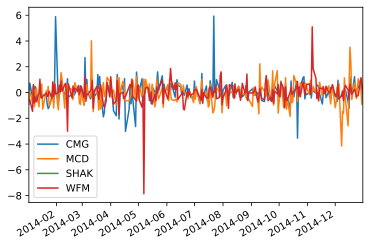

In [76]:
norm_returns = (mult_returns - mult_returns.mean(axis=0)) / mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

这使得比较我们示例中包含的不同时间序列的运动更容易。

移动平均和标准差也适用于 `DataFrame`。

In [77]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.columns = prices.columns

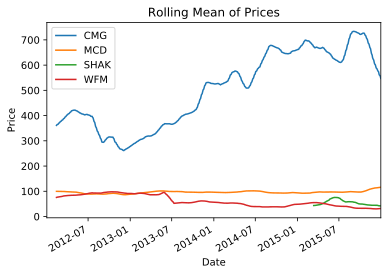

In [78]:
rolling_mean.plot()
plt.title('Rolling Mean of Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();